
# Advanced Big Data and Data Mining (MSCS-634-B01)
# Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python
# Sri Sai Palamoor

In [2]:
import pandas as pd

# Load dataset (the CSV file is downloaded and placed in the same directory)

df = pd.read_csv('data.csv', encoding='ISO-8859-1')
# Display the first five rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Histogram – Price Distribution

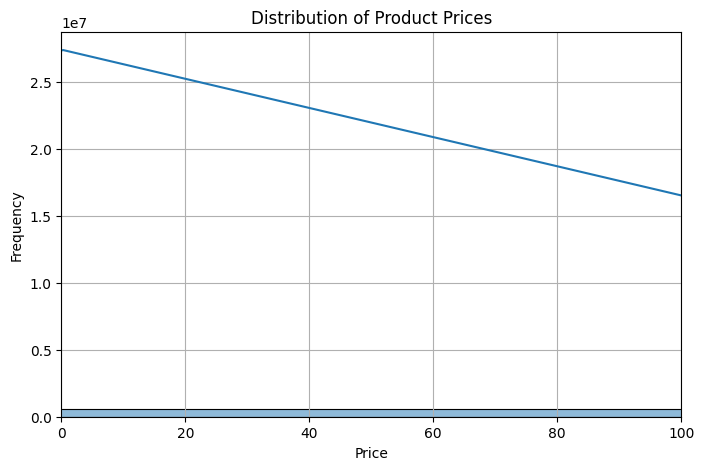

In [4]:

# Plot a histogram of product prices
plt.figure(figsize=(8, 5))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # limit x-axis to exclude extreme outliers
plt.grid(True)
plt.show()


Line Plot – Daily Sales Trend

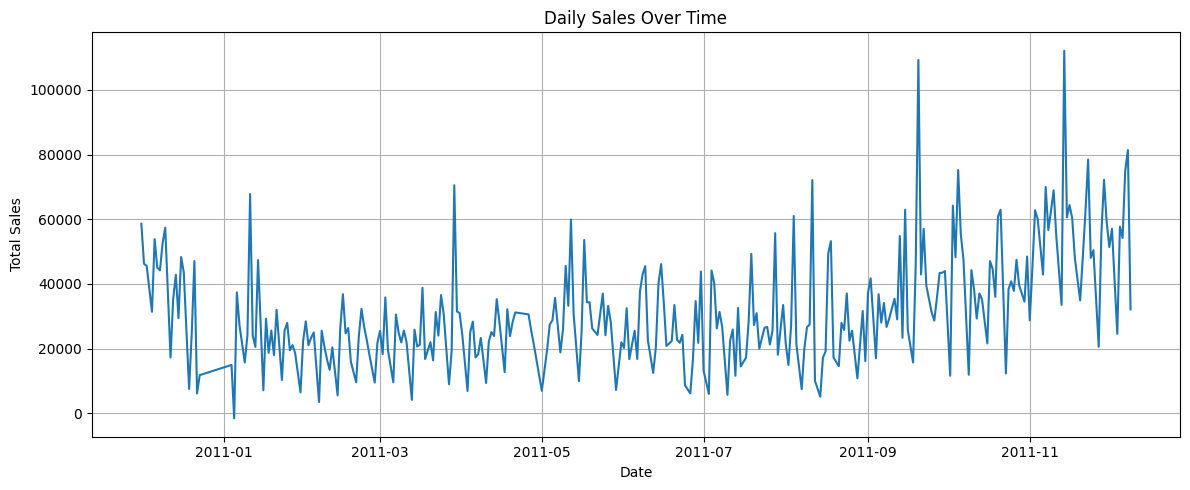

In [5]:
# Convert date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by date
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()

# Plot line chart
plt.figure(figsize=(12, 5))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.grid(True)
plt.show()


 Bar Chart – Total Sales by Country

/tmp/ipython-input-6-3650446250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')


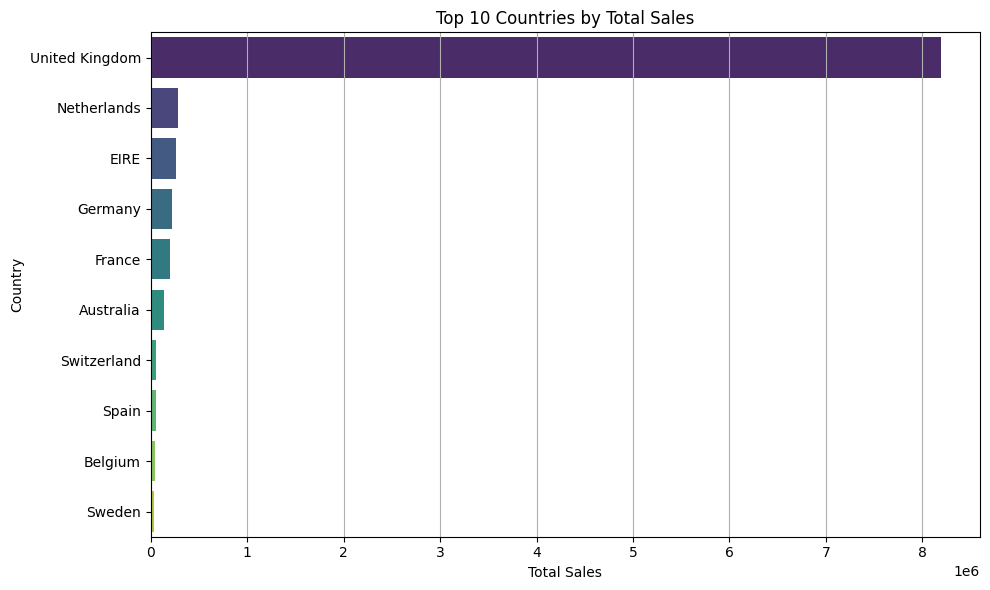

In [6]:
# Group by country and calculate total sales
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


 Check for missing values

In [8]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
TotalSales,0


Fill or drop missing values

In [9]:
# Example: Fill missing CustomerID with forward fill
df['CustomerID'] = df['CustomerID'].fillna(method='ffill')

# Alternatively, drop rows with any missing values (adjust as needed)
df = df.dropna()

# Confirm again
df.isnull().sum()


/tmp/ipython-input-9-2162656569.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CustomerID'] = df['CustomerID'].fillna(method='ffill')


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalSales,0


Outlier Detection and Removal

Use IQR to detect outliers in 'UnitPrice'

In [10]:
# IQR method
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show bounds
print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


IQR: 2.88, Lower Bound: -3.0700000000000003, Upper Bound: 8.45


Remove outliers

In [12]:
# Remove outliers
before_shape = df.shape
data = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]
after_shape = df.shape

print(f"Before: {before_shape}, After: {after_shape}")


Before: (540455, 9), After: (540455, 9)


Data Reduction

Sampling


In [20]:
# Reduce to 10% of the dataset
sampled_data = df.sample(frac=0.1, random_state=42)
sampled_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
359750,568196,23412,HEART MIRROR ANTIQUE WHITE,6,2011-09-25 14:44:00,7.50,16705.0,United Kingdom,45.00
498978,578548,23490,T-LIGHT HOLDER HANGING LOVE BIRD,1,2011-11-24 15:02:00,3.75,17345.0,United Kingdom,3.75
103891,545081,21533,RETROSPOT LARGE MILK JUG,3,2011-02-28 10:35:00,4.95,16057.0,United Kingdom,14.85
46036,540350,20712,JUMBO BAG WOODLAND ANIMALS,1,2011-01-06 14:14:00,1.95,18283.0,United Kingdom,1.95
40983,539750,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,20,2010-12-21 15:40:00,4.21,16996.0,United Kingdom,84.20


 Drop less useful columns

In [21]:
# Drop InvoiceNo and Description for simplification
reduced_data = sampled_data.drop(columns=['InvoiceNo', 'Description'])

# Display before and after column lists
print("Before:", df.columns.tolist())
print("After:", reduced_data.columns.tolist())
reduced_data.head()

Before: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales']
After: ['StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalSales']


,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
359750,23412,6,2011-09-25 14:44:00,7.50,16705.0,United Kingdom,45.00
498978,23490,1,2011-11-24 15:02:00,3.75,17345.0,United Kingdom,3.75
103891,21533,3,2011-02-28 10:35:00,4.95,16057.0,United Kingdom,14.85
46036,20712,1,2011-01-06 14:14:00,1.95,18283.0,United Kingdom,1.95
40983,22646,20,2010-12-21 15:40:00,4.21,16996.0,United Kingdom,84.20


Data Scaling and Discretization


Min-Max Scaling for UnitPrice


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reduced_data['ScaledPrice'] = scaler.fit_transform(reduced_data[['UnitPrice']])


Discretize Quantity into categories

In [18]:
# Bin quantity into 3 categories
reduced_data['QuantityBin'] = pd.cut(reduced_data['Quantity'], bins=3, labels=["Low", "Medium", "High"])


In [19]:
reduced_data.head()

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ScaledPrice,QuantityBin
359750,23412,6,2011-09-25 14:44:00,7.50,16705.0,United Kingdom,45.00,0.001010,High
498978,23490,1,2011-11-24 15:02:00,3.75,17345.0,United Kingdom,3.75,0.000505,High
103891,21533,3,2011-02-28 10:35:00,4.95,16057.0,United Kingdom,14.85,0.000666,High
46036,20712,1,2011-01-06 14:14:00,1.95,18283.0,United Kingdom,1.95,0.000263,High
40983,22646,20,2010-12-21 15:40:00,4.21,16996.0,United Kingdom,84.20,0.000567,High


General Overview of Data

In [22]:
# Basic data summary
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
 8   TotalSales   540455 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 41.2+ MB


In [23]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
count,540455.000000,540455,540455.000000,540455.000000,540455.000000
mean,9.603129,2011-07-04 16:20:42.947035392,4.623519,15272.551985,18.036188
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:49:00,1.250000,13798.000000,3.480000
50%,3.000000,2011-07-20 11:38:00,2.080000,15145.000000,9.840000
75%,10.000000,2011-10-19 11:49:00,4.130000,16801.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.007598,NaN,96.889628,1737.737738,379.318894


Central Tendency Measures

In [25]:
# Minimum, Maximum, Mean, Median, Mode for UnitPrice
min_val = df['UnitPrice'].min()
max_val = df['UnitPrice'].max()
mean_val = df['UnitPrice'].mean()
median_val = df['UnitPrice'].median()
mode_val = df['UnitPrice'].mode().iloc[0]  # take the first mode if multiple

print(f"Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}")


Min: -11062.06, Max: 38970.0, Mean: 4.623519023785516, Median: 2.08, Mode: 1.25


Dispersion Measures

In [26]:
# Range = Max - Min
range_val = max_val - min_val

# Quartiles
Q1 = df['UnitPrice'].quantile(0.25)
Q2 = df['UnitPrice'].quantile(0.50)
Q3 = df['UnitPrice'].quantile(0.75)

# IQR = Q3 - Q1
iqr = Q3 - Q1

# Variance and Standard Deviation
variance = df['UnitPrice'].var()
std_dev = df['UnitPrice'].std()

print(f"Range: {range_val}")
print(f"Q1: {Q1}, Q2 (Median): {Q2}, Q3: {Q3}")
print(f"IQR: {iqr}")
print(f"Variance: {variance}, Standard Deviation: {std_dev}")


Range: 50032.06
Q1: 1.25, Q2 (Median): 2.08, Q3: 4.13
IQR: 2.88
Variance: 9387.59994613661, Standard Deviation: 96.88962764990177


Correlation Analysis

In [27]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix


,Quantity,UnitPrice,CustomerID,TotalSales
Quantity,1.000000,-0.001248,-0.002381,0.888164
UnitPrice,-0.001248,1.000000,-0.000774,-0.162036
CustomerID,-0.002381,-0.000774,1.000000,-0.001964
TotalSales,0.888164,-0.162036,-0.001964,1.000000


Visualize the correlation matrix using a heatmap

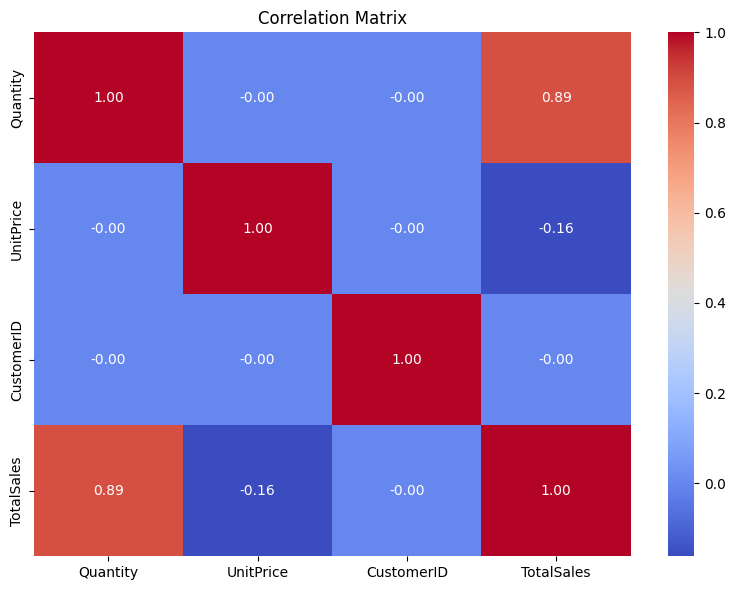

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
